# Exploring Data

- NAME: Chloe Wang
- ID: Qtr7bs

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [167]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("df_arabica_clean.csv")
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [168]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [169]:
country_count = df["Country of Origin"].value_counts().reset_index()
country_count.columns = ["Country of Origin", "Count"]
country_count

,Country of Origin,Count
0,Taiwan,61
1,Guatemala,21
2,Colombia,19
3,Honduras,13
4,Thailand,12
5,Ethiopia,11
6,Brazil,10
7,Costa Rica,8
8,Nicaragua,7
9,El Salvador,7


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



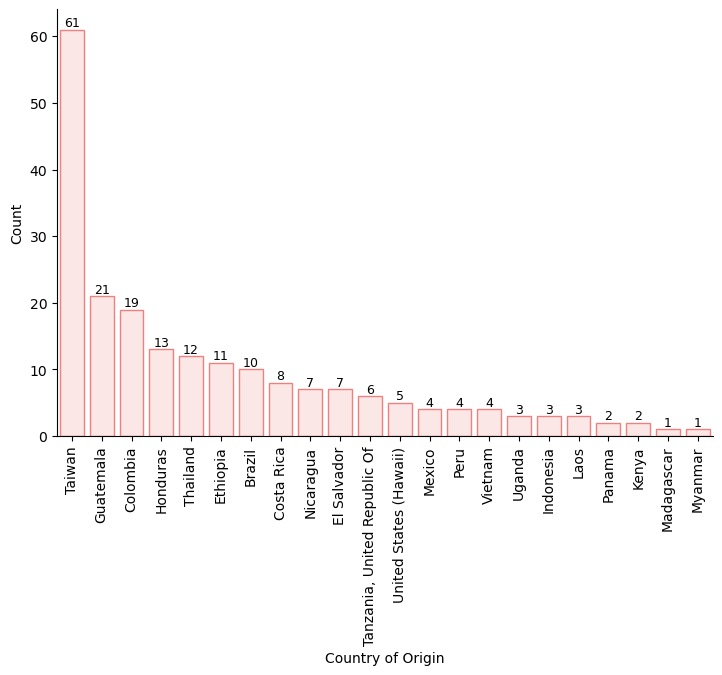

In [170]:
g = sns.catplot(data = country_count, x = "Country of Origin", y = "Count", kind = "bar", color = 'mistyrose', edgecolor = "lightcoral", aspect = 1.5)
plt.xticks(rotation = 90)
ax = g.axes[0,0] 
for p in ax.patches:
    value = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width()/2, 
        p.get_height(),              
        value,                         
        ha="center", va="bottom",
        fontsize=9
    )

In [171]:
country_count = df["Country of Origin"].value_counts().reset_index()
country_count.columns = ["Country of Origin", "Count"]
country_bags = df.groupby("Country of Origin", as_index=False)["Number of Bags"].sum()
country_summary = country_count.merge(country_bags, on="Country of Origin")
country_summary.columns = ["Country of Origin", "Count", "Total Bags"]
country_summary

,Country of Origin,Count,Total Bags
0,Taiwan,61,488
1,Guatemala,21,6432
2,Colombia,19,3064
3,Honduras,13,2884
4,Thailand,12,33
5,Ethiopia,11,2642
6,Brazil,10,5669
7,Costa Rica,8,1442
8,Nicaragua,7,1594
9,El Salvador,7,1498


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



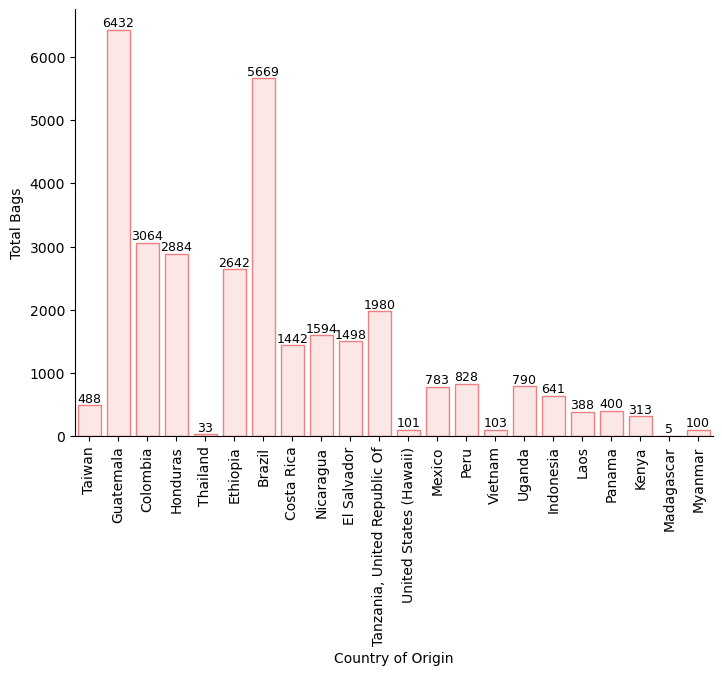

In [172]:
g = sns.catplot(data = country_summary, x = "Country of Origin", y = "Total Bags", kind = "bar", color = 'mistyrose', edgecolor = "lightcoral", aspect = 1.5)
plt.xticks(rotation = 90)
ax = g.axes[0,0] 
for p in ax.patches:
    value = int(p.get_height())
    ax.text(
        p.get_x() + p.get_width()/2, 
        p.get_height(),              
        value,                         
        ha="center", va="bottom",
        fontsize=9
    )

In [173]:
country_summary["Country of Origin"].value_counts().reset_index()


,Country of Origin,count
0,Taiwan,1
1,Guatemala,1
2,Madagascar,1
3,Kenya,1
4,Panama,1
5,Laos,1
6,Indonesia,1
7,Uganda,1
8,Vietnam,1
9,Peru,1


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



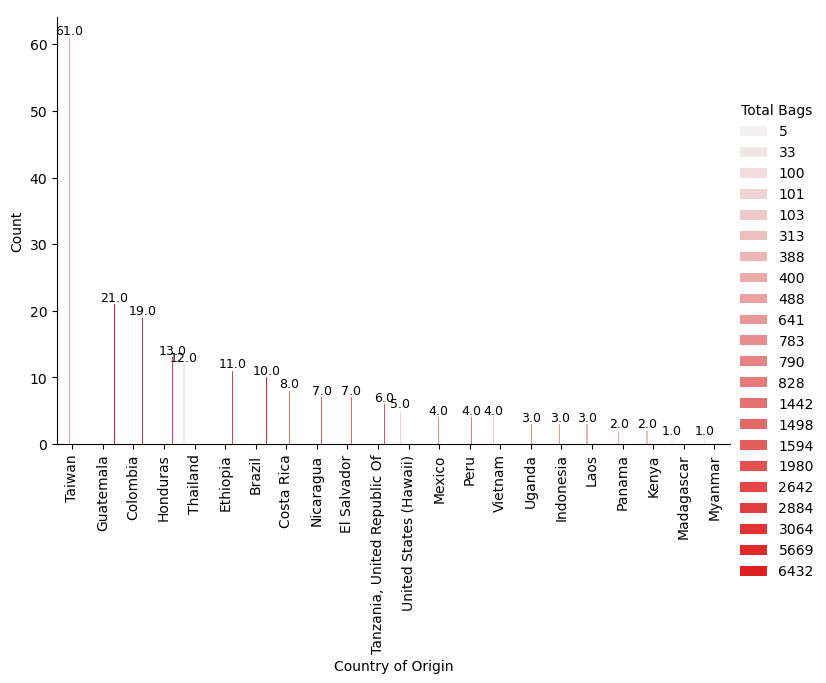

In [174]:
g = sns.catplot(data = country_summary, x = "Country of Origin", y = "Count", kind = "bar", color = 'red', hue = "Total Bags", linewidth = 1.5, aspect = 1.5)
plt.xticks(rotation = 90)
ax = g.axes[0,0] 
for p in ax.patches:
    value = p.get_height()
    if (math.isnan(value)):
        continue
    ax.text(
        p.get_x() + p.get_width()/2, 
        p.get_height(),              
        value,                         
        ha="center", va="bottom",
        fontsize=9
    )

In [175]:
cup_points_mean = df.groupby("Country of Origin", as_index=False)["Total Cup Points"].mean()
cup_points_mean.columns = ["Country of Origin", "Cup Points"]
cup_points_mean

,Country of Origin,Cup Points
0,Brazil,81.883000
1,Colombia,83.877368
2,Costa Rica,83.740000
3,El Salvador,81.532857
4,Ethiopia,84.960909
5,Guatemala,84.301429
6,Honduras,83.282308
7,Indonesia,83.693333
8,Kenya,83.710000
9,Laos,83.390000


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



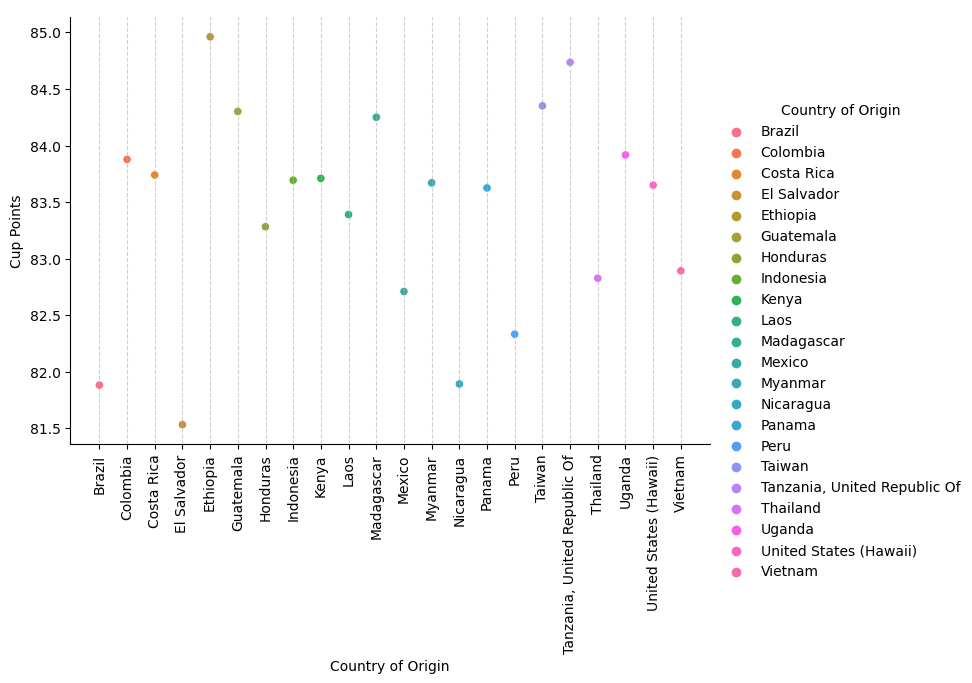

In [176]:
sns.relplot(cup_points_mean, x = "Country of Origin", y = "Cup Points", hue = "Country of Origin", aspect = 1.5)
plt.xticks(rotation = 90)
plt.grid(axis="x", linestyle="--", alpha=0.6)


Text(0.5, 1.0, 'Total Cup Points by Country')

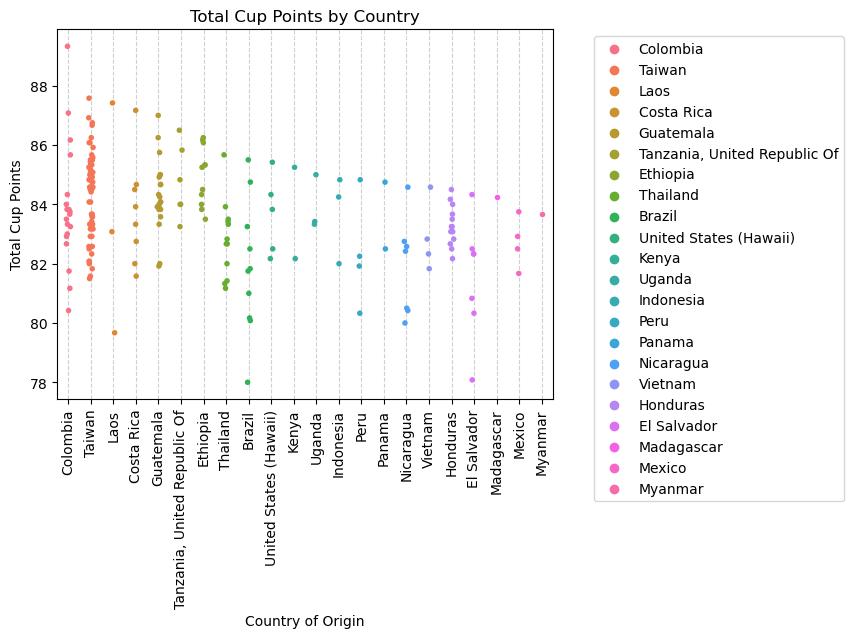

In [177]:
sns.stripplot(df, x = 'Country of Origin', y = 'Total Cup Points', hue = 'Country of Origin', size = 4)
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.6, 1), loc = 'upper right')
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.title("Total Cup Points by Country")


In [178]:
df["Total Cup Points"].min()
df["Total Cup Points"].max()

89.33

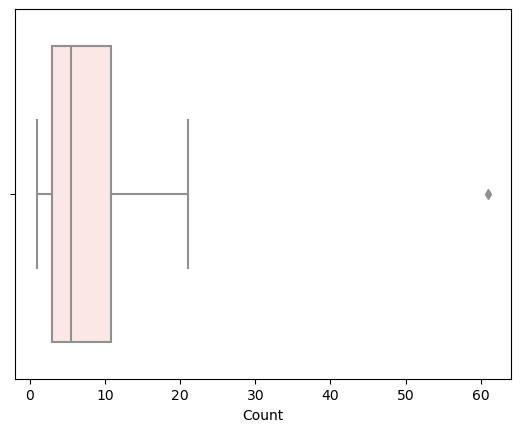

In [179]:
df_box = sns.boxplot(country_count, x = "Count", color = "mistyrose")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Colombia'),
  Text(0, 1, 'Taiwan'),
  Text(0, 2, 'Laos'),
  Text(0, 3, 'Costa Rica'),
  Text(0, 4, 'Guatemala'),
  Text(0, 5, 'Tanzania, United Republic Of'),
  Text(0, 6, 'Ethiopia'),
  Text(0, 7, 'Thailand'),
  Text(0, 8, 'Brazil'),
  Text(0, 9, 'United States (Hawaii)'),
  Text(0, 10, 'Kenya'),
  Text(0, 11, 'Uganda'),
  Text(0, 12, 'Indonesia'),
  Text(0, 13, 'Peru'),
  Text(0, 14, 'Panama'),
  Text(0, 15, 'Nicaragua'),
  Text(0, 16, 'Vietnam'),
  Text(0, 17, 'Honduras'),
  Text(0, 18, 'El Salvador'),
  Text(0, 19, 'Madagascar'),
  Text(0, 20, 'Mexico'),
  Text(0, 21, 'Myanmar')])

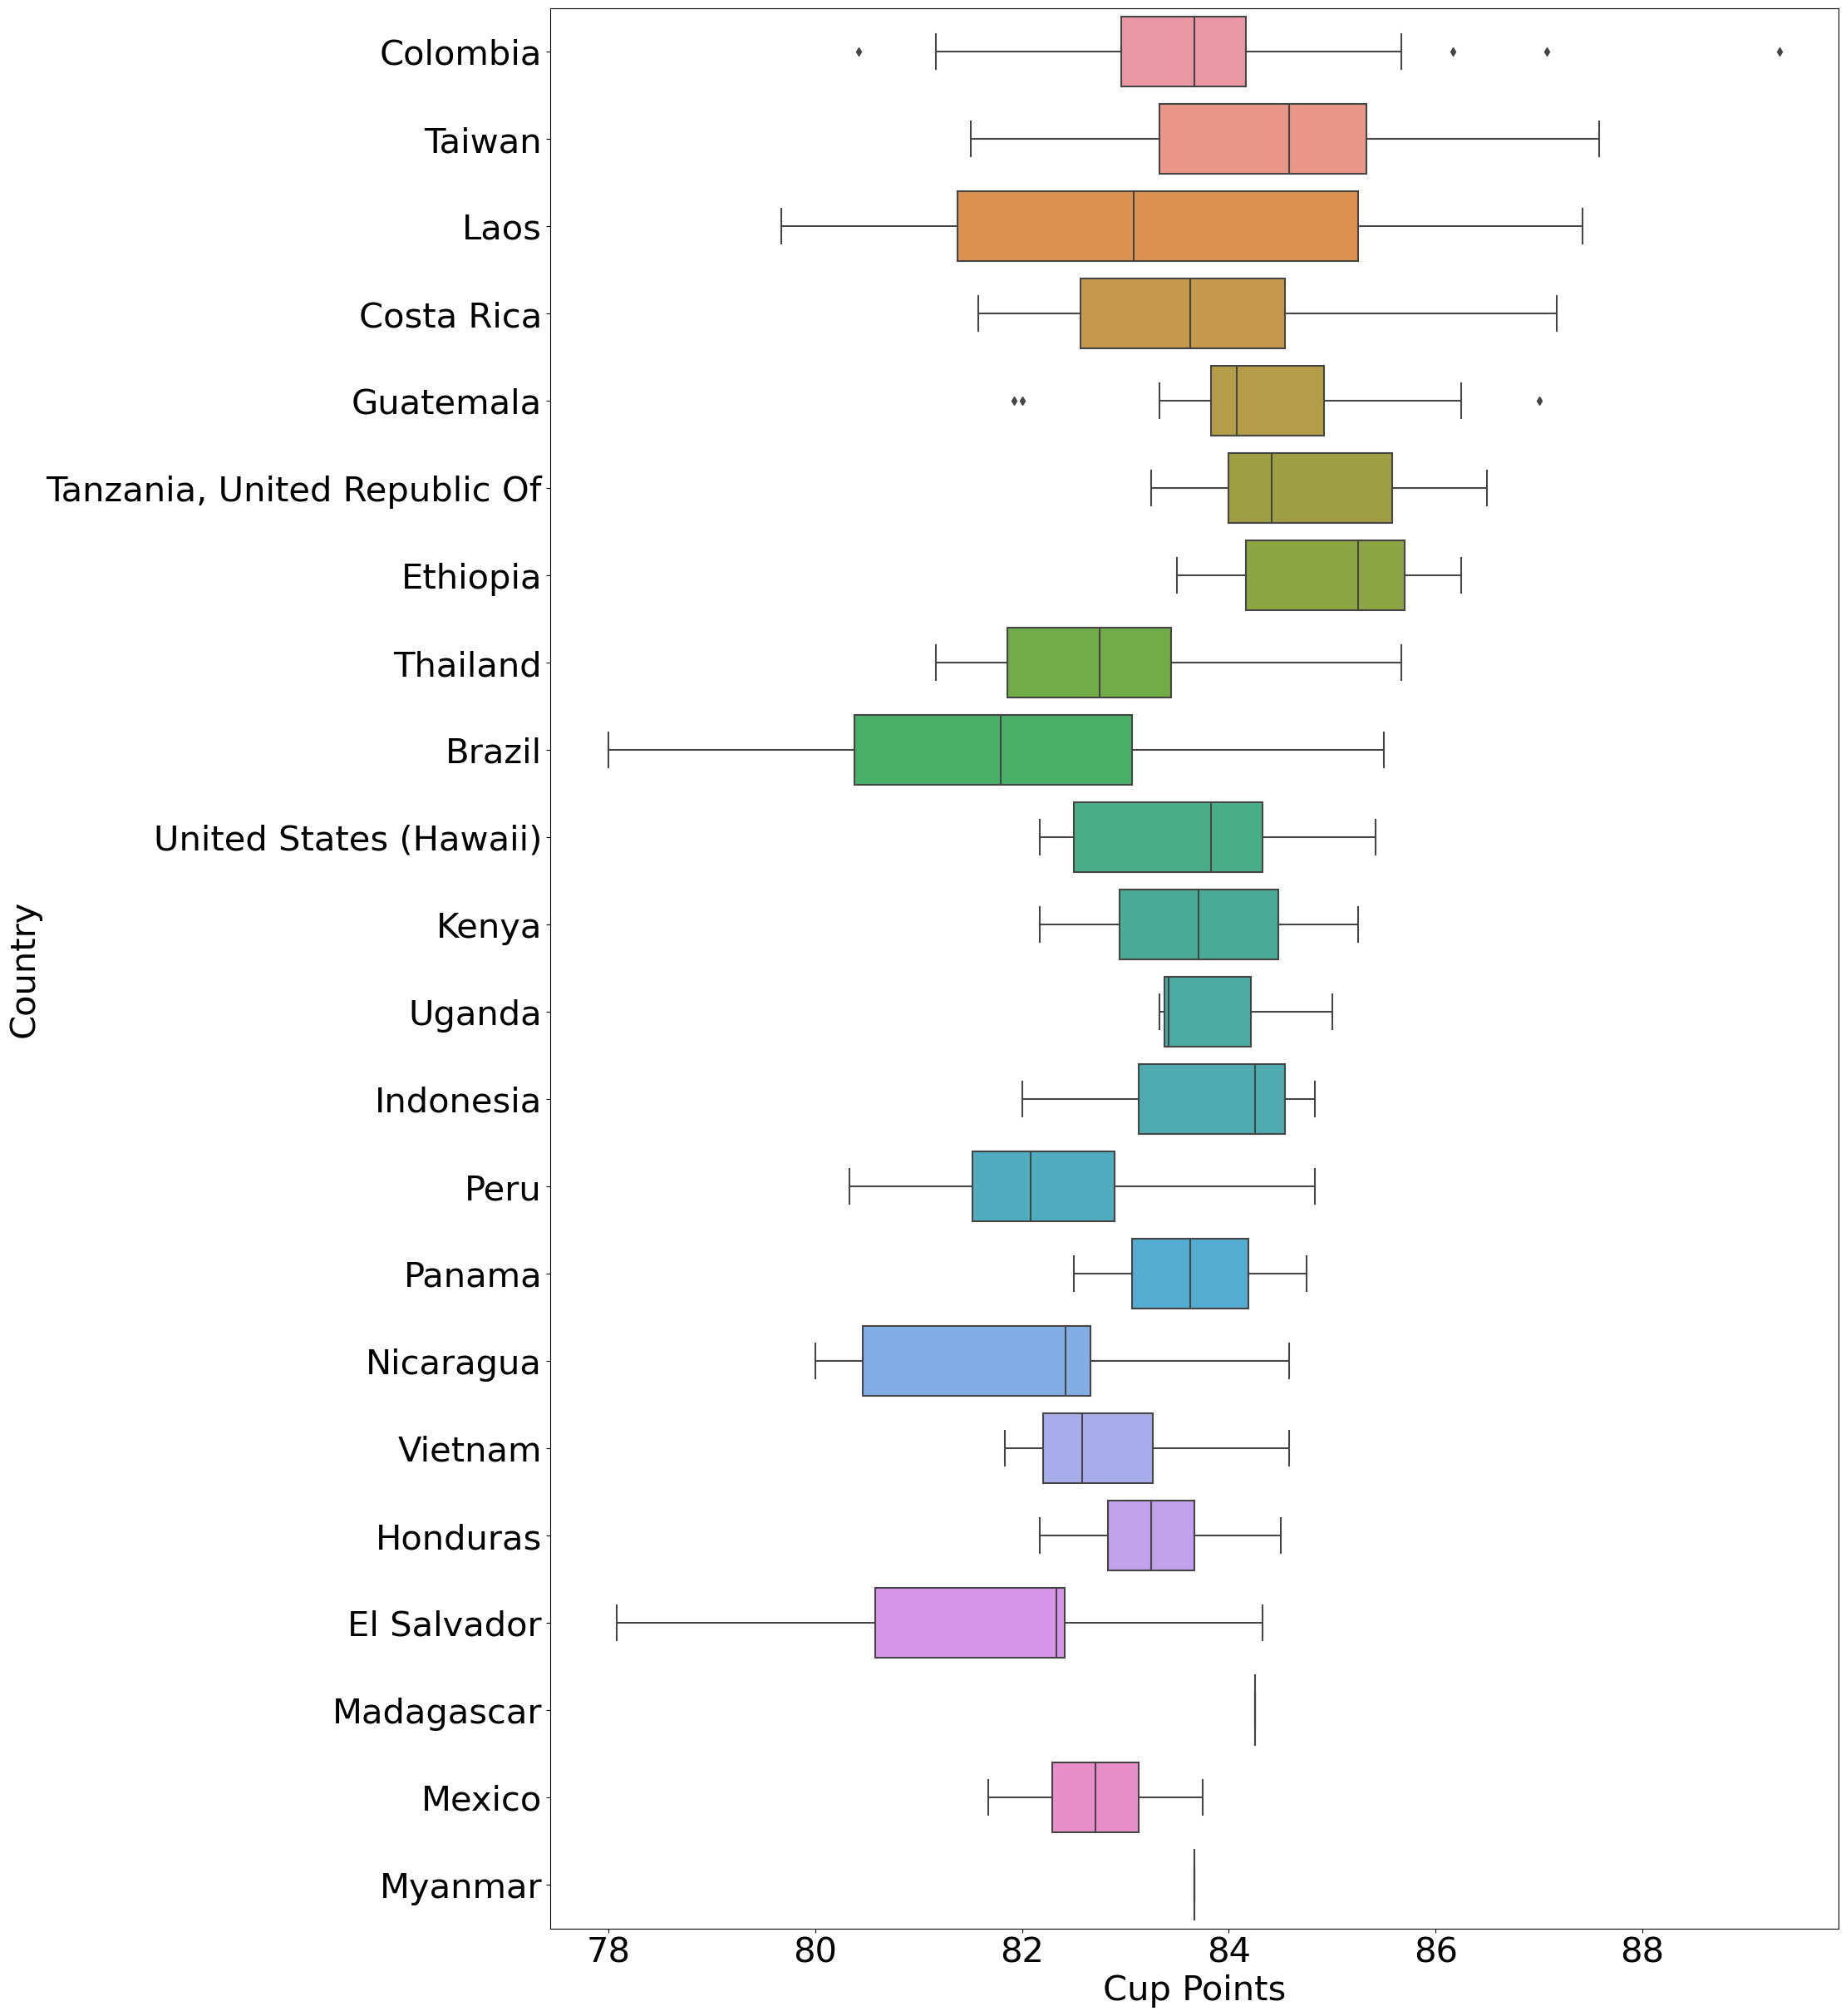

In [180]:
plt.figure(figsize=(20, 30))
sns.boxplot(data = df, y = "Country of Origin", x = "Total Cup Points")
plt.xlabel("Cup Points", fontsize = 30)
plt.ylabel("Country", fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

In [181]:
#df["Certification Address"].value_counts()
countries = ['Taiwan', 'Japan', 'Switzerland', 'Philippines', 'Jakarta',
'Guatemala', 'Madagascar', 'Kenya', 'Panama', 'Laos', 'Indonesia',
'Uganda', 'Vietnam', 'Peru', 'Mexico', 'United States', 'Tanzania',
'El Salvador', 'Nicaragua', 'Costa Rica', 'Brazil', 'Ethiopia',
'Thailand', 'Honduras', 'Colombia', 'Myanmar']

import re

def extract_country(address):
    if pd.isna(address):
        return "Unknown"
    
    address_str = str(address)
    normalized = address_str.lower()

    # 1. Direct match from known country list
    for c in countries:
        if c.lower() in normalized:
            return c

    # 2. Special fallback / region-based rules
    if "cortes" in normalized or "san pedro sula" in normalized:
        return "Honduras"
    if "rohrmoser" in normalized or "prisma dental" in normalized:
        return "Costa Rica"
    if "instituto de ecología" in normalized:
        return "Mexico"
    if "calle 60a" in normalized or "medellin" in normalized:
        return "Colombia"
    if "izusan" in normalized or "shizuoka" in normalized:
        return "Japan"
    if "atami" in normalized:
        return "Japan"
    if "commerce drive" in normalized:
        return "United States"
    if "del hotel seminole" in normalized:
        return "Nicaragua"
    if "calle pte" in normalized:
        return "El Salvador"

    # 3. REGEX but only for known uppercase country names
    uppercase_countries = ["USA", "JAPAN", "MEXICO"]
    for uc in uppercase_countries:
        if uc in address_str:
            return uc.title()

    return "Unknown"

df["Certification Country"] = df["Certification Address"].apply(extract_country)
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Certification Country
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,Japan
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwan
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",Taiwan
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,Japan
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,Japan


In [182]:
country_cert = df["Certification Country"].value_counts().reset_index()
country_cert.columns = ["Certification Country", "Certification Count"]
country_cert

,Certification Country,Certification Count
0,Taiwan,89
1,Japan,27
2,Guatemala,14
3,Honduras,10
4,Thailand,10
5,Kenya,8
6,Costa Rica,7
7,Ethiopia,6
8,El Salvador,6
9,Mexico,5


In [183]:
df[df["Certification Country"] == "Unknown"][["Certification Address", "Certification Country"]]

,Certification Address,Certification Country
64,*CURRENTLY NOT ACCEPTING SAMPLES**,Unknown
146,*CURRENTLY NOT ACCEPTING SAMPLES**,Unknown
155,*CURRENTLY NOT ACCEPTING SAMPLES**,Unknown
164,*CURRENTLY NOT ACCEPTING SAMPLES**,Unknown


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



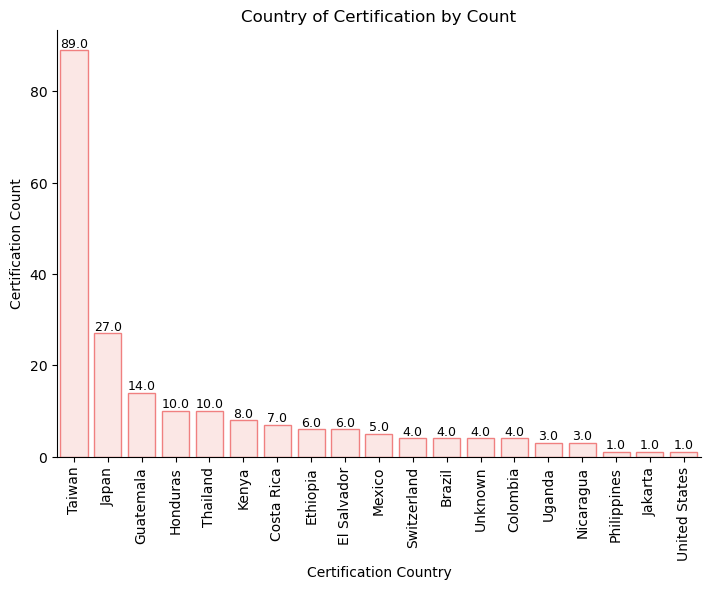

In [184]:
g = sns.catplot(data = country_cert, x = "Certification Country", y = "Certification Count", color = "mistyrose", edgecolor = "lightcoral", kind = "bar", aspect = 1.5)
plt.xticks(rotation = 90)
plt.title("Country of Certification by Count")
ax = g.axes[0,0] 
for p in ax.patches:
    value = p.get_height()
    if (math.isnan(value)):
        continue
    ax.text(
        p.get_x() + p.get_width()/2, 
        p.get_height(),              
        value,                         
        ha="center", va="bottom",
        fontsize=9
    )

In [185]:
total_country_bags = df.groupby("Country of Origin")["Number of Bags"].sum().reset_index()
total_country_bags.columns = ["Country of Origin", "Total Bags"]
bags_by_bin = (
    df.groupby(["Country of Origin", "CupPointsBin"])["Number of Bags"]
      .sum()
      .reset_index()
)
df_merge = bags_by_bin.merge(total_country_bags, on="Country of Origin")
df_merge["Proportion"] = df_merge["Number of Bags"] / df_merge["Total Bags"]
df_prop = df_merge.pivot_table(
    index="Country of Origin",
    columns="CupPointsBin",
    values="Proportion",
    fill_value=0
).reset_index()

df_prop.sort_values("High")


KeyError: 'CupPointsBin'

Final Alluvial

In [ ]:
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode()
pd.DataFrame.iteritems = pd.DataFrame.items

In [ ]:
def alluvialplot(df, dim_cols:list, color_col:str, title=None):
    
    # The color column must be a category
    if df[color_col].dtype != 'category':
        df[color_col] = df[color_col].astype('category')
    
    fig = px.parallel_categories(
        df, 
        dimensions=dim_cols,
        color=df[color_col].cat.codes,
        height=1000,
        width=800,
        title=title
    )
    fig.update_traces(line={'shape': 'hspline'})
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

In [ ]:
df_master = df[["Country of Origin","Number of Bags", "Total Cup Points", "Cup Points Category", "Certification Country"]].copy()
df["Cup Points Category"] = pd.qcut(df["Total Cup Points"], q=3, labels=["Low", "Medium", "High"])
df_master


In [ ]:
df_sorted = df_master.sort_values("Certification Country", ascending = True)
alluvialplot(df_sorted, dim_cols = ['Country of Origin', 'Certification Country', 'Cup Points Category'], color_col = 'Cup Points Category', title=None)

